# Miniproject-DQN Notebook
### Paul Boulenger, Paul Devianne

## Part 1: Introduction


In [1]:
#We import all necessary packages
import sys

import matplotlib.pyplot as plt
from gym import spaces

"""Environment imports"""
from epidemic_env.env       import Env, Log
from epidemic_env.dynamics  import ModelDynamics, Observation
from epidemic_env.visualize import Visualize
from epidemic_env.agent     import Agent

"""Pytorch and numpy imports"""
import numpy as np
import torch
from torch import nn



%load_ext autoreload
%autoreload 2
%matplotlib inline


### Question 1.a

[autoreload of DQN failed: Traceback (most recent call last):
  File "/Users/paul/anaconda3/envs/epi/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/Users/paul/anaconda3/envs/epi/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 496, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/paul/anaconda3/envs/epi/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 393, in update_generic
    update(a, b)
  File "/Users/paul/anaconda3/envs/epi/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 361, in update_class
    update_instances(old, new)
  File "/Users/paul/anaconda3/envs/epi/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 315, in update_instances
    refs = gc.get_referrers(old)
KeyboardInterrupt
]


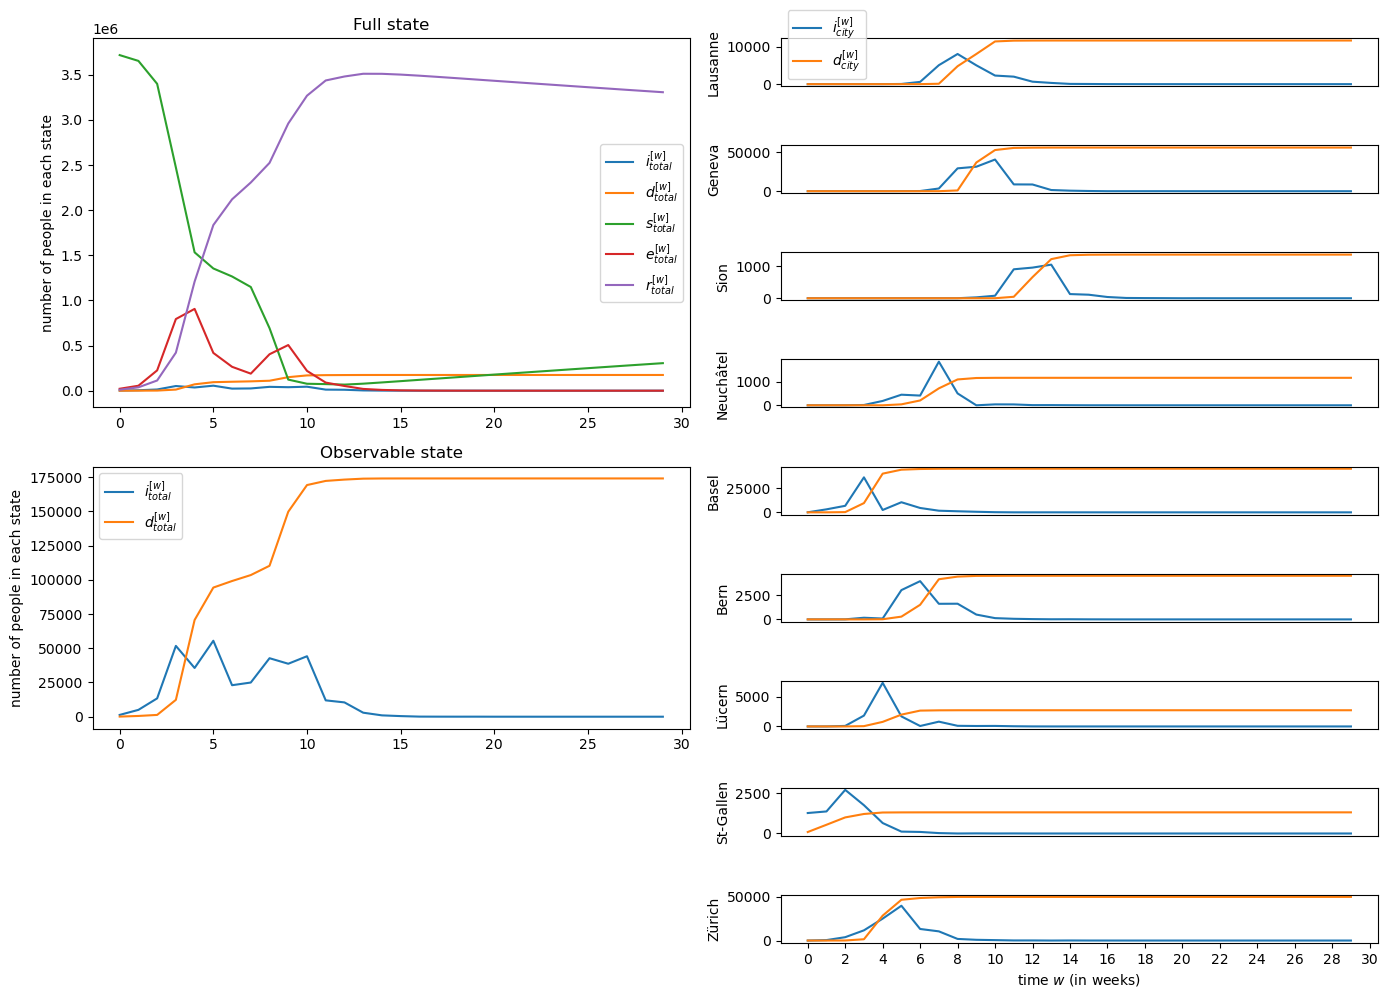

In [16]:
from utils import run_episode, action_preprocessor, run_episode, plot_episode
from utils import NoAgent

"""Loading the environment"""
dyn = ModelDynamics('config/switzerland.yaml')

env = Env(dyn,
            action_preprocessor=action_preprocessor)

no_agent = NoAgent(env)

log , _ = run_episode(no_agent, env)

plot_episode(log, dyn)

## Part 2: Professor Russo's Policy

In [3]:
from epidemic_env.agent import RussoAgent

In [4]:
def observation_preprocessor_Russo(obs: Observation, dyn:ModelDynamics):
    infected=np.array([np.array(obs.city[c].infected) for c in dyn.cities])[:,6].sum()
    return infected

In [5]:
dyn = ModelDynamics('config/switzerland.yaml')
env = Env(dyn,
            action_preprocessor=action_preprocessor,
            observation_preprocessor=observation_preprocessor_Russo)

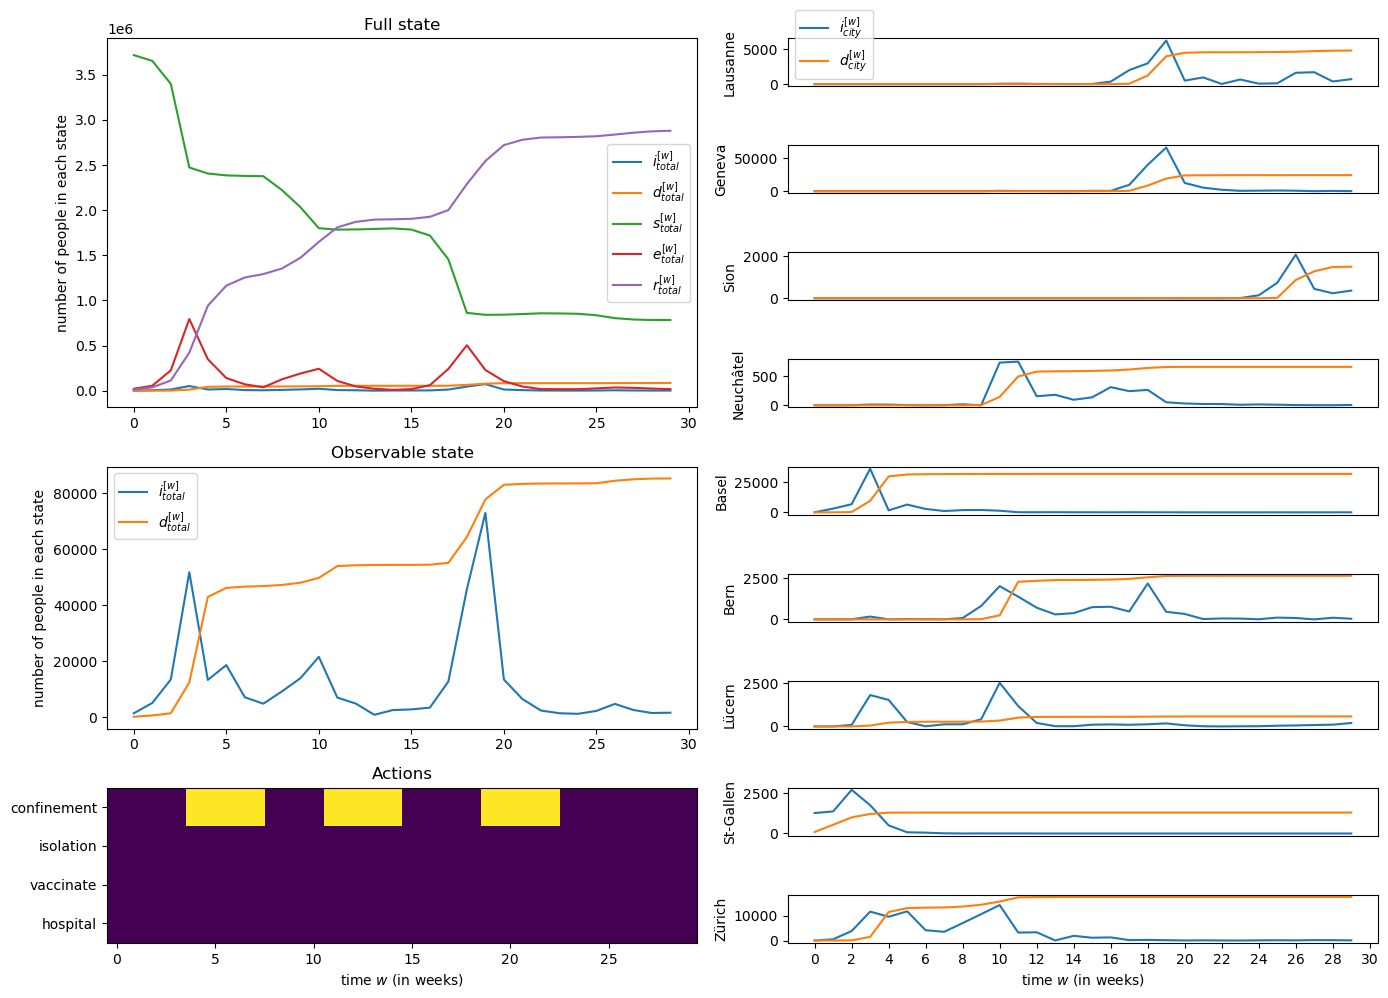

In [6]:
obs, info = env.reset(0)
agent = RussoAgent(env)

log, _ = run_episode(agent, env)
plot_episode(log, dyn, True)

## Part 3: A Deep Q-learning approach

2
189


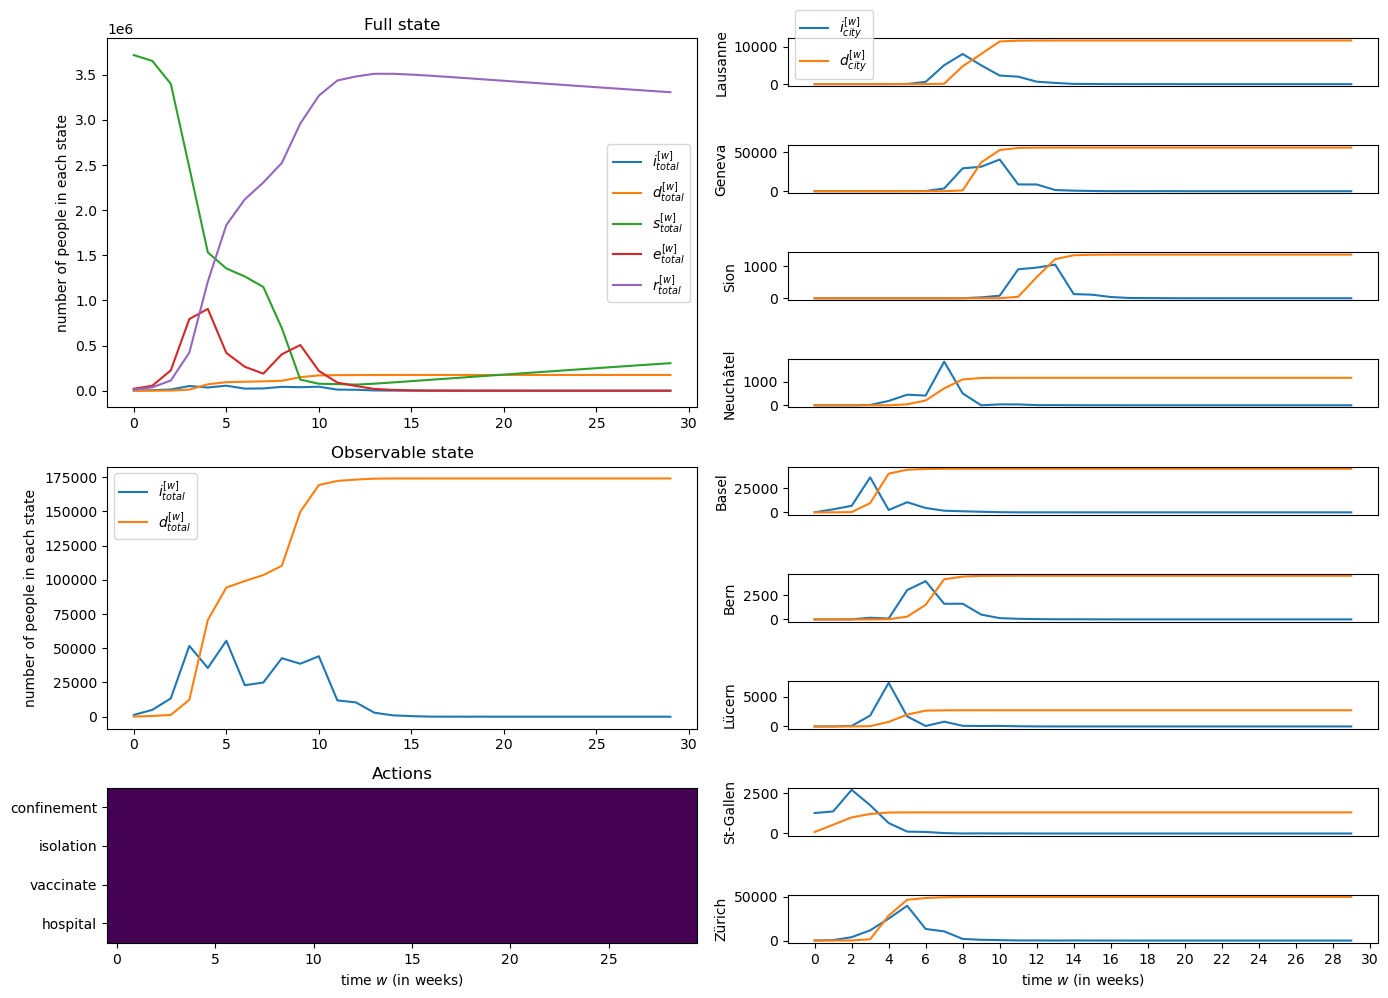

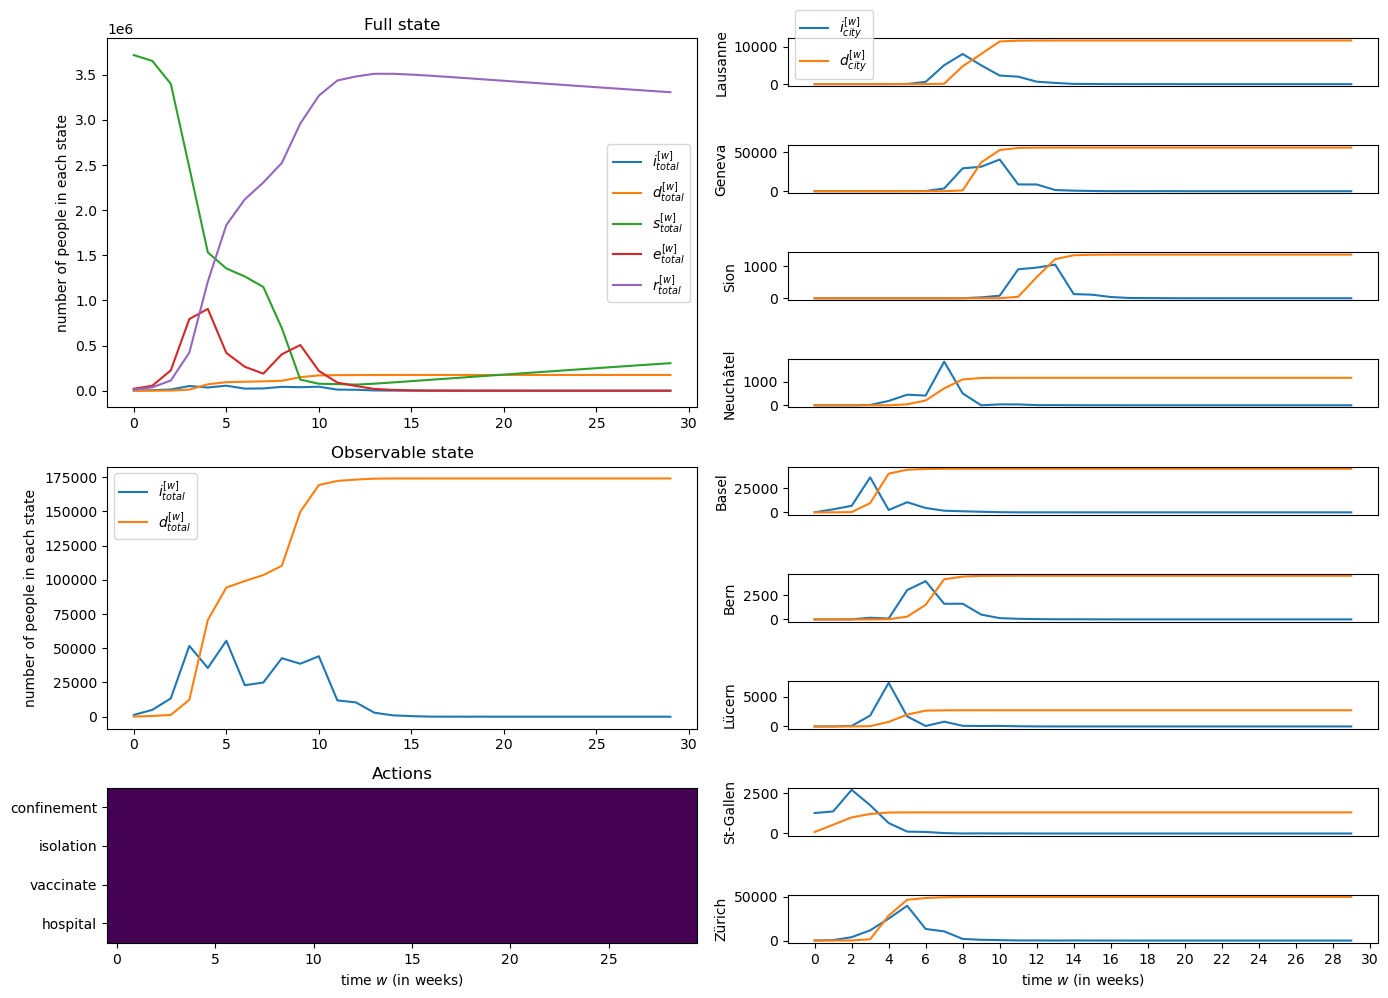

<class 'tuple'>


RuntimeError: Index tensor must have the same number of dimensions as input tensor

In [42]:
from DQN import *
action_space=spaces.Discrete(2)
dyn = ModelDynamics('config/switzerland.yaml')
observation_space   =   spaces.Box( low=0,
                                    high=1,
                                    shape=(3, dyn.n_cities, dyn.env_step_length),
                                    dtype=np.float16)


env = Env(dyn,
            action_space = action_space,
            observation_space= observation_space,
            action_preprocessor=action_preprocessor,
            observation_preprocessor=observation_preprocessor_DQN)

DQNagent  = DQNAgent(env)
training_trace = []

for i in range(500):
    log, rwds = training_episode(env, DQNagent)
    #training_trace.append(np.array(rwds).sum())
    if i%50 ==0 :  plot_episode(log, dyn, True)




## Part4: Dealing with a more complex action Space

## Part5: Wrapping Up